In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import root

In [15]:
def dxdt(t,x,tau_r,tau_f):
    a = x[0]
    b = x[1]
    
    return [ -a/tau_r, -b/tau_f]

In [16]:
t0 = 0
tfinal = 10
dt = 0.01

t = np.linspace(0, tfinal, 1000)


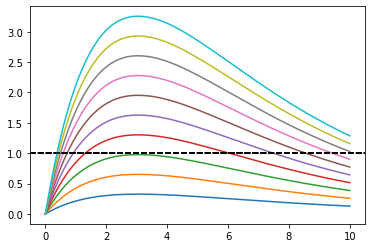

In [17]:
for f in np.linspace(1,10,10):
    # f = 3.07 looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s)
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])

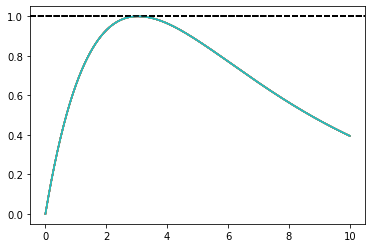

In [18]:
for f in np.linspace(1,10,10):
    f = 3.07 #looks like correct value
    x0 = [f,f]
    
    sol = solve_ivp(dxdt,[t0,tfinal],x0,args=(2,5),dense_output=True)
    
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]

    s = b - a

    plt.plot(t,s)
    plt.axhline(1, color='k', linestyle='--', label='y=1')
# plt.plot(t,np.ones(t.shape),'k--')
# plt.axis([2,4,0.95,1.05])

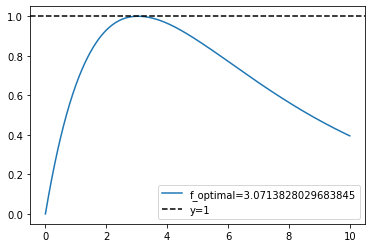

3.0713828029683845
3.0713828029683845


In [19]:
def dxdt(t, x, tau_r, tau_f):
    a = x[0]
    b = x[1]
    return [-a/tau_r, -b/tau_f]

# Define a function that computes the maximum of s(t) for a given initial f
def max_s_for_f(f, t0=0, tfinal=10, tau_r=2, tau_f=5):
    x0 = [f, f]  
    sol = solve_ivp(dxdt, [t0, tfinal], x0, args=(tau_r, tau_f), dense_output=True)
    

    t = np.linspace(t0, tfinal, 1000)
    a = sol.sol(t)[0]
    b = sol.sol(t)[1]
    s = b - a
    return np.max(s)

# Define the target function to find the root (i.e., when max_s(t) = 1)
def target_function(f_array):
    f = f_array[0]  # Extract scalar from array
    return max_s_for_f(f) - 1  # We want this to be 0 when max_s(t) = 1

# Use a root-finding algorithm to solve for f
sol_f = root(target_function, x0=[3])  # Initial guess for f wrapped in a list

# Extract the solution
f_optimal = sol_f.x[0]

# Now plot the result with the optimal f
t = np.linspace(0, 10, 1000)
x0 = [f_optimal, f_optimal]
sol = solve_ivp(dxdt, [0, 10], x0, args=(2, 5), dense_output=True)
a = sol.sol(t)[0]
b = sol.sol(t)[1]
s = b - a

plt.plot(t, s, label=f'f_optimal={f_optimal}')
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.legend()
plt.show()
print(f_optimal)
print(f_optimal)

In [8]:
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    dsdt = -s/tau_s + p/tau_s
    dpdt = -p/tau_s
    return [dsdt, dpdt]

In [9]:
t0 = 0
tfinal = 10
dt = 0.01

t = np.linspace(t0, tfinal, 1000)

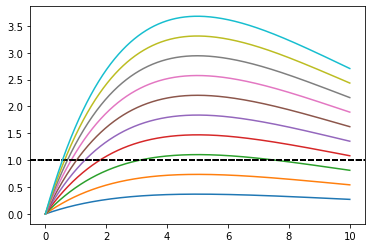

In [10]:
for f in np.linspace(1,10,10):
    
    x0 = [0,f]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)

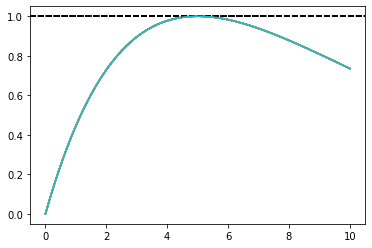

In [11]:
for f in np.linspace(1,10,10):
    
    x0 = [0,2.7185823035951033]
    
    sol = solve_ivp(dxdt_new,[t0,tfinal],x0,args=(5,),dense_output=True)
    
    s = sol.sol(t)[0]
    p = sol.sol(t)[1]

    plt.axhline(1, color='k', linestyle='--', label='y=1')

    plt.plot(t,s)

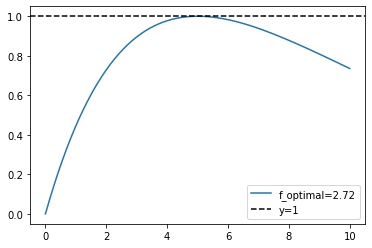

2.7185823035951033


In [12]:
# Define the new system of differential equations for s and p
def dxdt_new(t, x, tau_s):
    s = x[0]
    p = x[1]
    # Differential equations for s and p
    dsdt = -s/tau_s + p/tau_s
    dpdt = -p/tau_s
    return [dsdt, dpdt]

# Define a function that computes the maximum of s(t) for a given initial s and p
def max_s_for_f(f, t0=0, tfinal=10, tau_s=10):
    s0 = 0  # Initial condition for s
    p0 = f  # Initial condition for p
    x0 = [s0, p0]  # Initial conditions for s and p
    
    # Solve the system of differential equations
    sol = solve_ivp(dxdt_new, [t0, tfinal], x0, args=(tau_s,), dense_output=True)
    
    # Evaluate solution for t values
    t = np.linspace(t0, tfinal, 1000)
    s = sol.sol(t)[0]  # Extract s(t)
    
    # Return the maximum of s(t)
    return np.max(s)

# Define the target function to find the root (i.e., when max_s(t) = 1)
def target_function(f_array):
    f = f_array[0]  # Extract scalar from array
    return max_s_for_f(f) - 1  # We want this to be 0 when max_s(t) = 1

# Use a root-finding algorithm to solve for f
sol_f = root(target_function, x0=[3])  # Initial guess for f wrapped in a list

# Extract the solution
f_optimal = sol_f.x[0]

# Now plot the result with the optimal f
t = np.linspace(0, 10, 1000)
x0 = [0, f_optimal]
sol = solve_ivp(dxdt_new, [0, 10], x0, args=(5,), dense_output=True)
s = sol.sol(t)[0]  # Extract s(t)

plt.plot(t, s, label=f'f_optimal={f_optimal:.2f}')
plt.axhline(1, color='k', linestyle='--', label='y=1')
plt.legend()
plt.show()
print(f_optimal)